# Predictions based on fourth vector - v4

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Features:

* Age
* TMV (Total Market Value)
* Forma (zwycięstwa/przegrane) z ostatnich 3 meczów
* Forma (zwycięstwa/przegrane) z ostatnich 5 meczów 
* Średnia liczba oddanych strzałów z ostatnich 3 meczów
* Średnia liczba oddanych strzałów z ostatnich 5 meczów
* Średnia liczba strzałów na bramkę z ostatnich 3 meczów
* Średnia liczba strzałów na bramkę z ostatnich 5 meczów

In [2]:
model_data = pd.read_csv('learning_vectors/v04/version04-shotstransfermarkt_noNaNs.csv', sep=',')
model_data = model_data.set_index(['Match_id'])
model_data = model_data.sort_values(['League_id', 'Date'])
model_data.columns = [
    'League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
    'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST',
    'H_age', 'A_age',
    'H_TMV', 'A_TMV',
    'H_Form03', 'A_Form03',
    'H_Form05', 'A_Form05',
    'H_MeanShots03', 'A_MeanShots03',
    'H_MeanShots05', 'A_MeanShots05',
    'H_MeanShotsOnTarget03', 'A_MeanShotsOnTarget03',
    'H_Better_MeanShotsOnTarget05', 'A_Better_MeanShotsOnTarget05'
]

print(model_data.shape)
# model_data.head()


(6069, 29)


In [3]:
#Check for nulls
model_data.isnull().sum()
print(model_data.isnull().any().any())


False


## Different algorithms comparison

In [4]:
features = [
    'H_age', 'A_age',
    'H_TMV', 'A_TMV',
    'H_Form03', 'A_Form03',
    'H_Form05', 'A_Form05',
    'H_MeanShots03', 'A_MeanShots03',
    'H_MeanShots05', 'A_MeanShots05',
    'H_MeanShotsOnTarget03', 'A_MeanShotsOnTarget03',
    'H_Better_MeanShotsOnTarget05', 'A_Better_MeanShotsOnTarget05'
]

ALGS = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

print(model_data[features].shape)
model_data[features].head()


(6069, 16)


,H_age,A_age,H_TMV,A_TMV,H_Form03,A_Form03,H_Form05,A_Form05,H_MeanShots03,A_MeanShots03,H_MeanShots05,A_MeanShots05,H_MeanShotsOnTarget03,A_MeanShotsOnTarget03,H_Better_MeanShotsOnTarget05,A_Better_MeanShotsOnTarget05
Match_id,,,,,,,,,,,,,,,,
1730,24.0,5.0,14.0,4.0,4,1,7,1,19.000000,11.333333,15.8,10.2,10.666667,5.333333,9.4,4.2
1731,6.0,14.0,3.0,8.0,0,6,3,12,5.333333,16.333333,7.0,15.0,2.333333,8.000000,3.8,8.0
1732,15.0,22.0,8.0,9.0,4,3,5,5,10.666667,13.000000,11.6,14.6,5.666667,6.333333,7.0,8.0
1734,10.0,15.0,5.0,11.0,6,4,10,4,10.000000,11.666667,11.4,11.8,5.333333,7.000000,6.0,6.4
1735,14.0,8.0,10.0,5.0,7,4,11,7,10.000000,8.333333,11.2,9.2,6.666667,5.000000,6.2,5.4


### Basic compraison: 

Alg/res.mean/res.std
LR: 0.575384 (0.004001)
LDA: 0.573406 (0.006841)
KNN: 0.502882 (0.008139)
CART: 0.464657 (0.009444)
NB: 0.514088 (0.005140)
SVM: 0.524302 (0.009686)


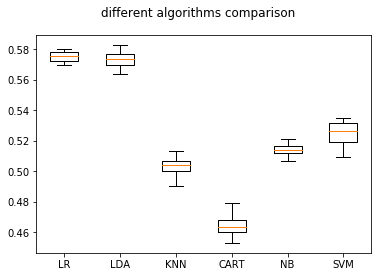

In [5]:
X = model_data[features]
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Basic comparison with preprocessing:

Alg/res.mean/res.std
LR: 0.575546 (0.013880)
LDA: 0.572747 (0.008709)
KNN: 0.509805 (0.014218)
CART: 0.454109 (0.014331)
NB: 0.517220 (0.004181)
SVM: 0.579500 (0.013818)


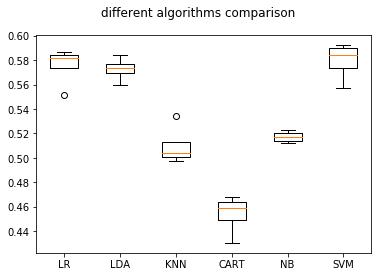

In [6]:
X = preprocessing.scale(model_data[features])
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
